In [1]:
import phoebe
from phoebe import u, c

import pandas as pd
pd.set_option('display.max_columns', 500)

import numpy as np

import os
import sys
from pathlib import Path
baseModulePath = str(Path(os.getcwd()).parents[1].absolute())
if baseModulePath not in sys.path:
	sys.path.append(baseModulePath)

import importlib
import analisis.phoebe_model.utils as gen_utils
importlib.reload(gen_utils)

logger = phoebe.logger(clevel='WARNING')

# OBJ_DATA_DIR = "/run/media/ramon/ROG_Data/Tesis/IturbideDatos/ATOJ339.9469+45.1464"
OBJ_DATA_DIR = "/home/ramon/uanl/Tesis/Backup Data"
CONCAT_OBSERVATIONS_CSV = f"{OBJ_DATA_DIR}/culledObjData.csv"
GAIA_EPOCH_PHOTOMETRY_CSV = f"{OBJ_DATA_DIR}/Gaia Epoch Photometry - Indiv/EPOCH_PHOTOMETRY-Gaia DR3 1982536257931470464.csv"

## Iturbide observation data

In [2]:
iturbideObservations = pd.read_csv(CONCAT_OBSERVATIONS_CSV, index_col=0)
iturbideObservations

,MAG,MERR,FLUX,FERR,NORM_FLUX,OTIME,obsv_date,julianDate,NORM_FERR,RAPERT
0,17.981,0.031,38512.91,1088.952417,1.026973,2022-10-21 22:54:21.841000-05:00,2022-10-21,2.459874e+06,0.029038,20.0
1,18.061,0.027,35790.91,876.946726,0.954389,2022-10-21 22:55:22.219000-05:00,2022-10-21,2.459874e+06,0.023384,20.0
2,18.024,0.030,37013.54,1011.180591,0.986992,2022-10-21 22:56:22.714000-05:00,2022-10-21,2.459874e+06,0.026964,20.0
3,17.929,0.021,40406.38,776.604189,1.077464,2022-10-21 22:57:23.081000-05:00,2022-10-21,2.459874e+06,0.020709,20.0
4,18.002,0.020,37782.93,702.207615,1.007508,2022-10-21 22:58:23.606000-05:00,2022-10-21,2.459874e+06,0.018725,20.0
...,...,...,...,...,...,...,...,...,...,...
120,18.291,0.013,28951.98,356.052501,0.853835,2022-12-10 20:52:39.875000-06:00,2022-12-10,2.459924e+06,0.010500,9.0
121,18.288,0.017,29047.29,442.997067,0.856646,2022-12-10 20:53:40.007000-06:00,2022-12-10,2.459924e+06,0.013065,9.0
122,18.329,0.021,27972.15,541.056134,0.824938,2022-12-10 20:54:40.156000-06:00,2022-12-10,2.459924e+06,0.015957,9.0
123,18.361,0.016,27142.27,390.640562,0.800464,2022-12-10 20:55:40.318000-06:00,2022-12-10,2.459924e+06,0.011521,9.0


## Gaia epoch photometry

In [3]:
gaiaObservations = pd.read_csv(GAIA_EPOCH_PHOTOMETRY_CSV)
gaiaObservations = gaiaObservations[(gaiaObservations['rejected_by_photometry'] == False) & (gaiaObservations['rejected_by_variability'] == False)]

# TODO: correct jdTime here
	# Gaia is barycentric, need to figure out what kind of conversion I'd need to do here to match time used in Iturbide data
gaiaObservations['jdTime'] = gaiaObservations['time'] + 2_455_197.5
gaiaObservations

,source_id,transit_id,band,time,mag,flux,flux_error,flux_over_error,rejected_by_photometry,rejected_by_variability,other_flags,solution_id,jdTime
0,1982536257931470464,15914106402149388,G,1684.645069,16.809998,3555.883734,13.240487,268.561400,False,False,1,375316653866487564,2.456882e+06
1,1982536257931470464,15923847240881531,G,1684.821236,16.808627,3560.378122,11.872833,299.876040,False,False,1,375316653866487564,2.456882e+06
2,1982536257931470464,15927939542726427,G,1684.895246,16.925122,3198.144064,14.858678,215.237460,False,False,1,375316653866487564,2.456882e+06
3,1982536257931470464,15937680367558820,G,1685.071412,16.899170,3275.507705,64.642659,50.670994,False,False,4097,375316653866487564,2.456883e+06
4,1982536257931470464,15941772663767622,G,1685.145395,16.775474,3670.768815,13.205851,277.965330,False,False,4194305,375316653866487564,2.456883e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,1982536257931470464,68564649765818840,RP,2636.797157,16.107843,2857.728742,34.570173,82.664580,False,False,0,375316653866487564,2.457834e+06
209,1982536257931470464,68574390600082284,RP,2636.973312,16.210664,2599.517311,29.385957,88.461210,False,False,0,375316653866487564,2.457834e+06
210,1982536257931470464,68578482921453413,RP,2637.047319,16.354475,2277.026942,38.569154,59.037514,False,False,0,375316653866487564,2.457835e+06
211,1982536257931470464,71504440274863554,RP,2689.962995,16.131512,2796.104174,30.633779,91.275200,False,False,0,375316653866487564,2.457887e+06


In [14]:
gaia_g  = gaiaObservations[gaiaObservations['band'] == 'G']
gaia_bp = gaiaObservations[gaiaObservations['band'] == 'BP']
gaia_rp = gaiaObservations[gaiaObservations['band'] == 'RP']

print(gaia_g.to_string())
print("-----------------------------------------------------------------------------------------")
print(gaia_bp.to_string())
print("-----------------------------------------------------------------------------------------")
print(gaia_rp.to_string())

              source_id         transit_id band         time        mag         flux  flux_error  flux_over_error  rejected_by_photometry  rejected_by_variability  other_flags         solution_id        jdTime
0   1982536257931470464  15914106402149388    G  1684.645069  16.809998  3555.883734   13.240487       268.561400                   False                    False            1  375316653866487564  2.456882e+06
1   1982536257931470464  15923847240881531    G  1684.821236  16.808627  3560.378122   11.872833       299.876040                   False                    False            1  375316653866487564  2.456882e+06
2   1982536257931470464  15927939542726427    G  1684.895246  16.925122  3198.144064   14.858678       215.237460                   False                    False            1  375316653866487564  2.456882e+06
3   1982536257931470464  15937680367558820    G  1685.071412  16.899170  3275.507705   64.642659        50.670994                   False                    Fal

## PHOEBE bundle set-up

In [5]:
b = phoebe.default_contact_binary()

In [6]:
b.add_compute(
    compute='fast_compute',
    
    # speed up compute for the sake of the demo; DON'T PUBLISH WITH THESE
    irrad_method='none', # TODO: does this affect results considerably? should I even use fast_compute at all for this model?
    rv_method='dynamical', # no meshing; compute rvs from first principles
    distortion_method='sphere',
    atm='blackbody',
    overwrite=True
)

<ParameterSet: 36 parameters | components: _default, primary, contact_envelope, secondary>

In [7]:
computePhases = phoebe.linspace(0, 1, 16)
b.add_dataset('mesh', compute_times=b.to_time(computePhases), dataset='mesh01', columns=['teffs'], overwrite=True)
print(b['mesh01'])

ParameterSet: 9 parameters
     compute_times@mesh01@dataset: [0.         0.03333333 0.06666667 ...
 0.43333333 0.46666667 0.5       ] d
C   compute_phases@mesh01@dataset: [ 0.          0.06666667  0.13333333 ...
 -0.13333333 -0.06666667  0.        ]
         phases_t0@mesh01@dataset: t0_supconj
     include_times@mesh01@dataset: []
       coordinates@mesh01@dataset: ['xyz', 'uvw']
           columns@mesh01@dataset: ['teffs']
         enabled@phoebe01@compute: True
     enabled@fast_compute@compute: True
        compute_phases@constraint: times_to_phases({compute_times@mesh01@dataset}, {phases_period@mesh01@dataset}, {period@binary@component}, {period_anom@binary@component}, {phases_dpdt@mesh01@dataset}, {dpdt@binary@component}, {phases_t0@mesh01@dataset}, {t0_supconj@binary@component}, {t0_perpass@binary@component}, {t0_ref@binary@component})


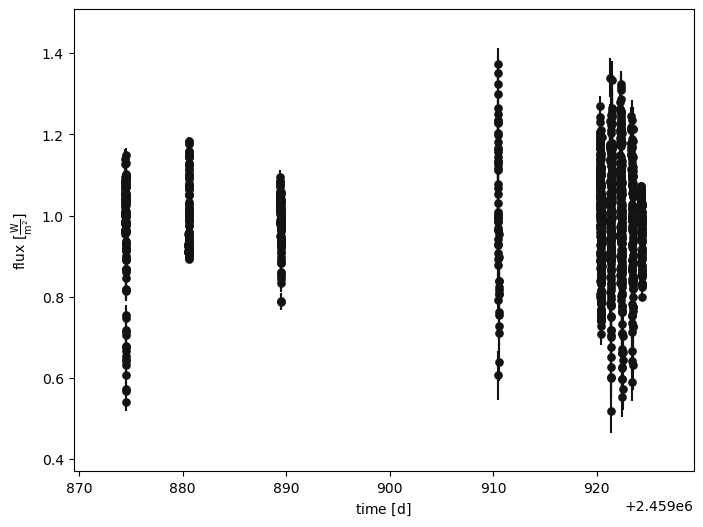

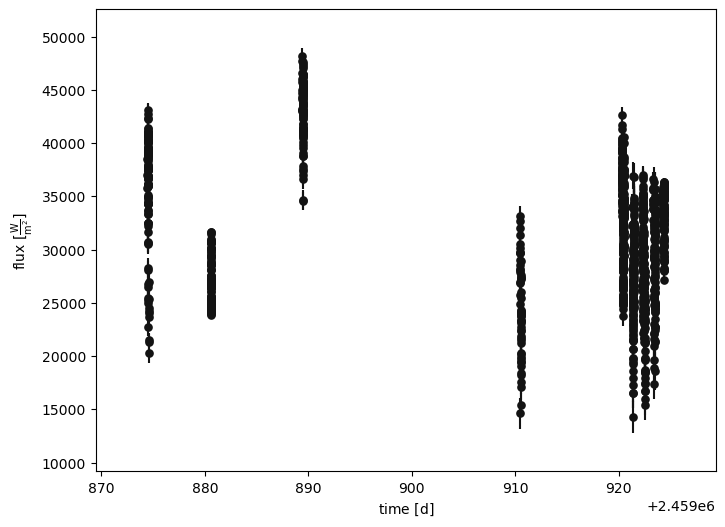

(<autofig.figure.Figure | 1 axes | 1 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [8]:
b.add_dataset('lc', dataset='lc_iturbide', overwrite=True,
              times=iturbideObservations['julianDate'].to_numpy()*u.day, 
              fluxes=iturbideObservations['NORM_FLUX'].to_numpy(), sigmas=iturbideObservations['NORM_FERR'].to_numpy())
b.add_dataset('lc', dataset='lc_iturbide_raw', overwrite=True,
              times=iturbideObservations['julianDate'].to_numpy()*u.day, 
              fluxes=iturbideObservations['FLUX'].to_numpy(), sigmas=iturbideObservations['FERR'].to_numpy())
b.plot(dataset='lc_iturbide', show=True, marker='.')
b.plot(dataset='lc_iturbide_raw', show=True, marker='.')

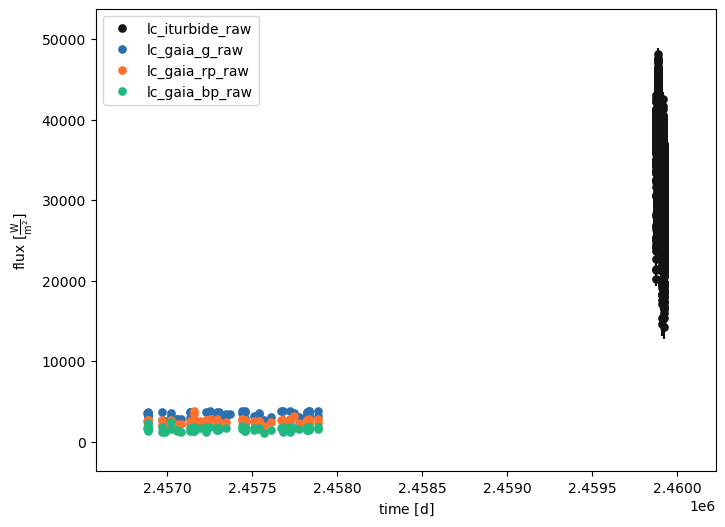

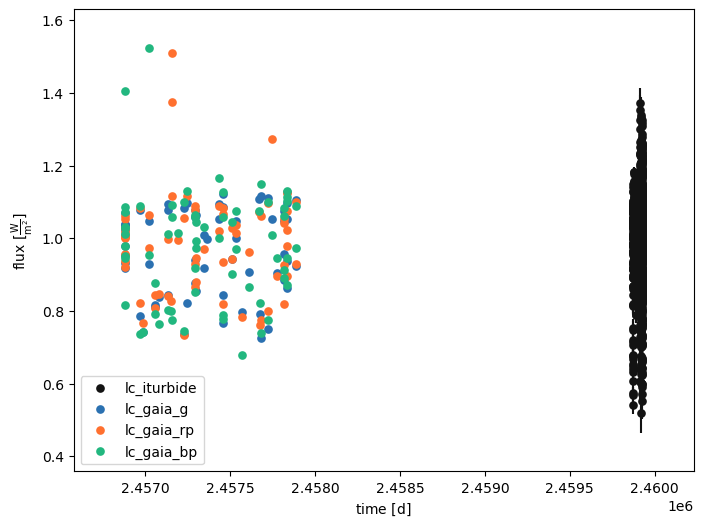

(<autofig.figure.Figure | 1 axes | 4 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [9]:
gaia_g_fluxes  = gaia_g['flux'].to_numpy()
gaia_rp_fluxes = gaia_rp['flux'].to_numpy()
gaia_bp_fluxes = gaia_bp['flux'].to_numpy()
b.add_dataset('lc', 
              times=gaia_g['jdTime'].to_numpy()*u.day, fluxes=gaia_g_fluxes/np.median(gaia_g_fluxes), 
              passband='Gaia:G', dataset='lc_gaia_g', overwrite=True)
b.add_dataset('lc', 
              times=gaia_rp['jdTime'].to_numpy()*u.day, fluxes=gaia_rp_fluxes/np.median(gaia_rp_fluxes), 
              passband='Gaia:RP', dataset='lc_gaia_rp', overwrite=True)
b.add_dataset('lc', 
              times=gaia_bp['jdTime'].to_numpy()*u.day, fluxes=gaia_bp_fluxes/np.median(gaia_bp_fluxes), 
              passband='Gaia:BP', dataset='lc_gaia_bp', overwrite=True)

b.add_dataset('lc', 
              times=gaia_g['jdTime'].to_numpy()*u.day, fluxes=gaia_g_fluxes, sigmas=gaia_g['flux_error'].to_numpy(),
              passband='Gaia:G', dataset='lc_gaia_g_raw', overwrite=True)
b.add_dataset('lc', 
              times=gaia_rp['jdTime'].to_numpy()*u.day, fluxes=gaia_rp_fluxes, sigmas=gaia_rp['flux_error'].to_numpy(),
              passband='Gaia:RP', dataset='lc_gaia_rp_raw', overwrite=True)
b.add_dataset('lc', 
              times=gaia_bp['jdTime'].to_numpy()*u.day, fluxes=gaia_bp_fluxes, sigmas=gaia_bp['flux_error'].to_numpy(),
              passband='Gaia:BP', dataset='lc_gaia_bp_raw', overwrite=True)
# b.plot(kind='lc', dataset=['lc_gaia_g', 'lc_gaia_bp', 'lc_gaia_rp'], show=True, legend=True, marker='.')
# b.plot(kind='lc', dataset='lc_gaia_g', show=True, legend=True)
b.plot(kind='lc', dataset=[d for d in b.datasets if 'raw' in d], show=True, legend=True, marker='.')
b.plot(kind='lc', dataset=[d for d in b.datasets if 'raw' not in d], show=True, legend=True, marker='.')

In [10]:
# disabled by default, not sure if gaia data will be useful here
b.disable_dataset('lc_gaia_g')
b.disable_dataset('lc_gaia_rp')
b.disable_dataset('lc_gaia_bp')

# also disable raw datasets by default, only want to work with normalized data for now
[b.disable_dataset(d) for d in b.datasets if 'raw' in d and d != 'mesh01']

[<ParameterSet: 20 parameters | components: primary, binary, secondary>,
 <ParameterSet: 20 parameters | components: primary, binary, secondary>,
 <ParameterSet: 20 parameters | components: primary, binary, secondary>,
 <ParameterSet: 20 parameters | components: primary, binary, secondary>]

In [11]:
b.save("./bundle-saves/iturbide_gaia-data")

'./bundle-saves/iturbide_gaia-data'